Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 6**: The code in the cell below has errors. There are errors in style and errors preventing the code to run as intended. 

Your **task** is to find all mistakes, remove them, make the code function properly such that it presents a correct figure at the end and achieves a 10 out of 10 marks from the style checker. 

It is strongly recommended to start the exercise by copying the entire code to a separate python file and examine it in Spyder. The code checking should then improve your style mark.

**Note A**: Leave the function names unchanged. Some may be assumed in tests. Constant values as given are all correct.

**Note B**: Make sure you use the `pylintrc` file from Moodle for style checking (keep it in the same folder as your python file in Spyder so that style checking in Spyder automatically uses it as configuration file).

**Note C**: Copy your final solution back into the cell below so that the tests can run.

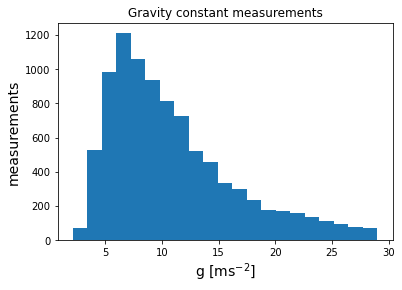

In [1]:
'''
Free fall simulation with measurement errors.

This example contains programming faults and also physics blunders!
Hint: Suppress gravity accelerations above 29 m/s^2.
'''

from random import gauss
import numpy as np
import matplotlib.pyplot as plt


def gravity(height, time):
    ''' Gravity Func'''
    grav = 2*height/time**2
    return grav if grav <= 29 else-1


def fallsim(attempts, height, heightError, time, timeError):
    ''' Fall Sim '''
    collector = np.array([])
    for _ in range(attempts):  # no counter variable needed
        distance = gauss(height, heightError)
        watch = gauss(time, timeError)
        collector = np.append(collector, gravity(distance, watch))
    return collector[collector != -1]


pisa = 58  # [m]
falltime = 3.4  # [s] in standard Earth gravity
herror = 0.5  # [m] uncertainty from where to drop to the floor
werror = 1.0  # [s] watches were rather uncertain
measurements = fallsim(10000, pisa, herror, falltime, werror)
plt.hist(measurements, 21)
plt.title('Gravity constant measurements')
plt.ylabel('measurements', fontsize=14)
plt.xlabel('g [ms$^{-2}$]', fontsize=14)
plt.show()


In [2]:
# test
assert (gravity(58, 3.4)>10.0 and gravity(58, 3.4)<10.1)

In [3]:
# test
arr = np.array(fallsim(100, pisa, herror, falltime, werror))
assert (np.mean(arr)>9.0 and np.mean(arr)<12.0)

### Tests - 2 marks; Style - 1 mark; Plot - 1 mark